# Manipulating timeseries with pandas

**context ** : MEOM group meetings

**author** : J. Le Sommer, reproducing commands from this [tutorial by N. Koldunov](http://earthpy.org/time_series_analysis_with_pandas_part_2.html)

**purpose** : basic demonstration of pandas functionnalities


## 0. Required preliminary installations

```bash
$ conda install pandas
$ pip install pandas
```

## 1. Import and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option('max_rows',15) # this limit maximum numbers of rows

In [2]:
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii

--2017-01-23 11:34:01--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Résolution de www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)… 140.90.101.63
Connexion à www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.63|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 20100 (20K) [text/plain]
Sauvegarde en : « monthly.ao.index.b50.current.ascii.1 »

100%[======================================>] 20.100      --.-K/s   ds 0,1s    

2017-01-23 11:34:02 (203 KB/s) — « monthly.ao.index.b50.current.ascii.1 » sauvegardé [20100/20100]

--2017-01-23 11:34:03--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii
Résolution de www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)… 140.90.101.63
Connexion à www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.63|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 19296 (19K) [text/plain]
Sauvegarde

## 2. I/O with pandas

In [3]:
ao = np.loadtxt('monthly.ao.index.b50.current.ascii')
dates = pd.date_range('1950-01', '2017-01', freq='M')
AO = pd.Series(ao[:,2], index=dates)

In [4]:
!tail norm.nao.monthly.b5001.current.ascii

 2016    3  0.73440E+00
 2016    4  0.37514E+00
 2016    5 -0.77358E+00
 2016    6 -0.43251E+00
 2016    7 -0.17603E+01
 2016    8 -0.16453E+01
 2016    9  0.61096E+00
 2016   10  0.41125E+00
 2016   11 -0.16366E+00
 2016   12  0.47833E+00


In [5]:
NAO = pd.read_table('norm.nao.monthly.b5001.current.ascii', sep='\s*', \
              parse_dates={'dates':[0, 1]}, header=None, index_col=0, squeeze=True)



/Users/lesommer/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [6]:
NAO

dates
1950-01-01    0.92000
1950-02-01    0.40000
1950-03-01   -0.36000
1950-04-01    0.73000
1950-05-01   -0.59000
1950-06-01   -0.06000
1950-07-01   -1.26000
               ...   
2016-06-01   -0.43251
2016-07-01   -1.76030
2016-08-01   -1.64530
2016-09-01    0.61096
2016-10-01    0.41125
2016-11-01   -0.16366
2016-12-01    0.47833
Name: 2, dtype: float64

In [7]:
aonao = pd.DataFrame({'AO':AO, 'NAO':NAO})

In [8]:
aonao.head(10)

,AO,NAO
1950-01-01,NaN,0.92
1950-01-31,-0.060310,NaN
1950-02-01,NaN,0.40
1950-02-28,0.626810,NaN
1950-03-01,NaN,-0.36
1950-03-31,-0.008127,NaN
1950-04-01,NaN,0.73
1950-04-30,0.555100,NaN
1950-05-01,NaN,-0.59
1950-05-31,0.071577,NaN


In [9]:
aonao = pd.DataFrame({'AO':AO.to_period(freq='M'), 'NAO':NAO.to_period(freq='M')} )

In [10]:
aonao.head(10)

,AO,NAO
dates,,
1950-01,-0.060310,0.92
1950-02,0.626810,0.40
1950-03,-0.008127,-0.36
1950-04,0.555100,0.73
1950-05,0.071577,-0.59
1950-06,0.538570,-0.06
1950-07,-0.802480,-1.26
1950-08,-0.851010,-0.05
1950-09,0.357970,0.25


## 3. Seasonal mean with resample

In [11]:
q_mean = aonao.resample('Q-NOV')

In [ ]:
q_mean.head()

/Users/lesommer/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


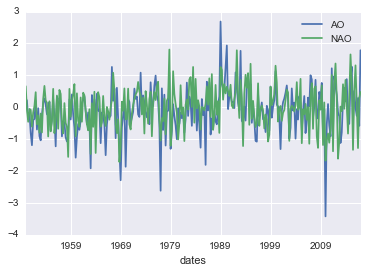

In [12]:
q_mean.plot()

In [13]:
m3_mean = aonao[2:].resample('3M', closed='left'  )

In [14]:
m3_mean.head()

/Users/lesommer/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


,AO,NAO
dates,,
1950-05-31,0.206183,-0.073333
1950-08-31,-0.371640,-0.456667
1950-11-30,-0.178680,-0.053333
1951-02-28,-0.804333,-0.080000
1951-05-31,-1.191120,-0.610000


/Users/lesommer/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


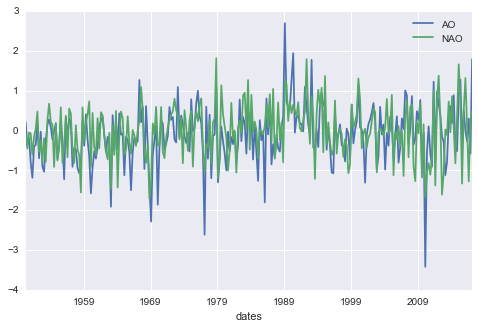

In [15]:
m3_mean.plot(figsize=(8,5))

## 4. Multi-year monthly means with groupby


In [17]:
aonao['mon'] = aonao.index.month
aonao

,AO,NAO,mon
dates,,,
1950-01,-0.060310,0.92000,1
1950-02,0.626810,0.40000,2
1950-03,-0.008127,-0.36000,3
1950-04,0.555100,0.73000,4
1950-05,0.071577,-0.59000,5
1950-06,0.538570,-0.06000,6
1950-07,-0.802480,-1.26000,7
...,...,...,...
2016-06,0.312880,-0.43251,6


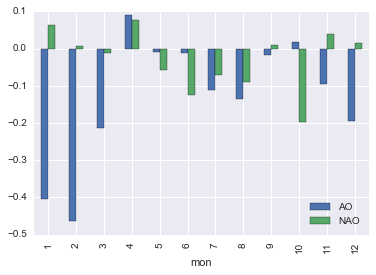

In [18]:
monmean = aonao['1950':'2013'].groupby('mon').aggregate('mean')
monmean.plot(kind='bar')

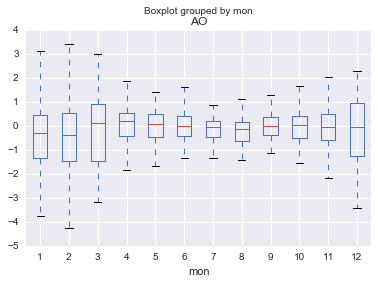

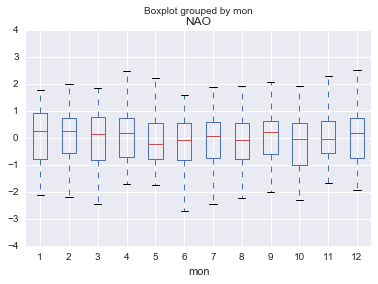

In [19]:
ax = aonao.boxplot(column=['AO'], by='mon')
ax = aonao.boxplot(column=['NAO'], by='mon')